In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
from bigdatavqa.divisiveclustering import (
    DivisiveClusteringKMeans,
    DivisiveClusteringMaxCut,
    DivisiveClusteringRandom,
    DivisiveClusteringVQE,
    get_divisive_sequence,
)

from bigdatavqa.divisiveclustering import Dendrogram
import warnings

In [3]:
warnings.filterwarnings('ignore')

number_of_qubits = 10
circuit_depth = 1
max_shots = 1000
max_iterations = 100
data_location = "../data"
number_of_coresets_to_evaluate = 15
number_of_sampling_for_centroids = 20
threshold_for_max_cut = 0.2

### Load data

In [4]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from ../data/dataset.pickle


### Get coresets

In [5]:
coreset = Coreset(raw_data, number_of_sampling_for_centroids, number_of_qubits, number_of_coresets_to_evaluate)
coreset_vectors, coreset_weights = coreset.get_best_coresets()

Using BFL16 method to generate coresets


In [6]:
coreset_df = pd.DataFrame(coreset_vectors, columns=list("XY"))
coreset_df['weights'] = coreset_weights
coreset_df["Name"] = [chr(i + 65) for i in coreset_df.index]
coreset_df

,X,Y,weights,Name
0,1.215511,-1.128060,62.599985,A
1,-0.921357,1.277426,268.388559,B
2,-0.552945,0.756203,143.135331,C
3,7.463596,0.039303,156.363867,D
4,2.540955,-1.652954,62.375206,E
5,8.564643,-1.473570,37.969395,F
6,5.622083,2.489953,78.438981,G
7,7.514354,-0.079893,145.639236,H
8,6.380994,1.935859,185.301938,I
9,-0.069269,-0.134797,79.713010,J


Text(0.5, 1.0, 'Visualizing raw data and the corresponding coreset')

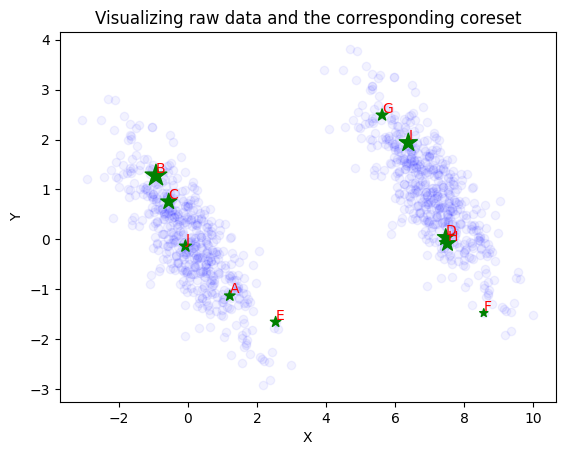

In [7]:
plt.scatter(raw_data[:, 0], raw_data[:, 1], color = 'blue', alpha=0.05)
plt.scatter(coreset_df.X, coreset_df.Y, s = coreset_df.weights, marker='*', color = 'green')
for idx, row in coreset_df.iterrows():
    plt.annotate(row["Name"], xy = (row.X, row.Y+ 0.05), color = "red")

plt.xlabel("X")
plt.ylabel("Y")

plt.title("Visualizing raw data and the corresponding coreset")

100%|██████████| 1/1 [00:00<00:00, 10866.07it/s]


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 3, 7], [0, 2, 4, 5, 6, 8, 9], [1, 7], [3], [2, 4, 5, 8, 9], [0, 6], [1], [7], [2, 5], [4, 8, 9], [6], [0], [2], [5], [4], [8, 9], [8], [9]]
cost: 359.0099067501876


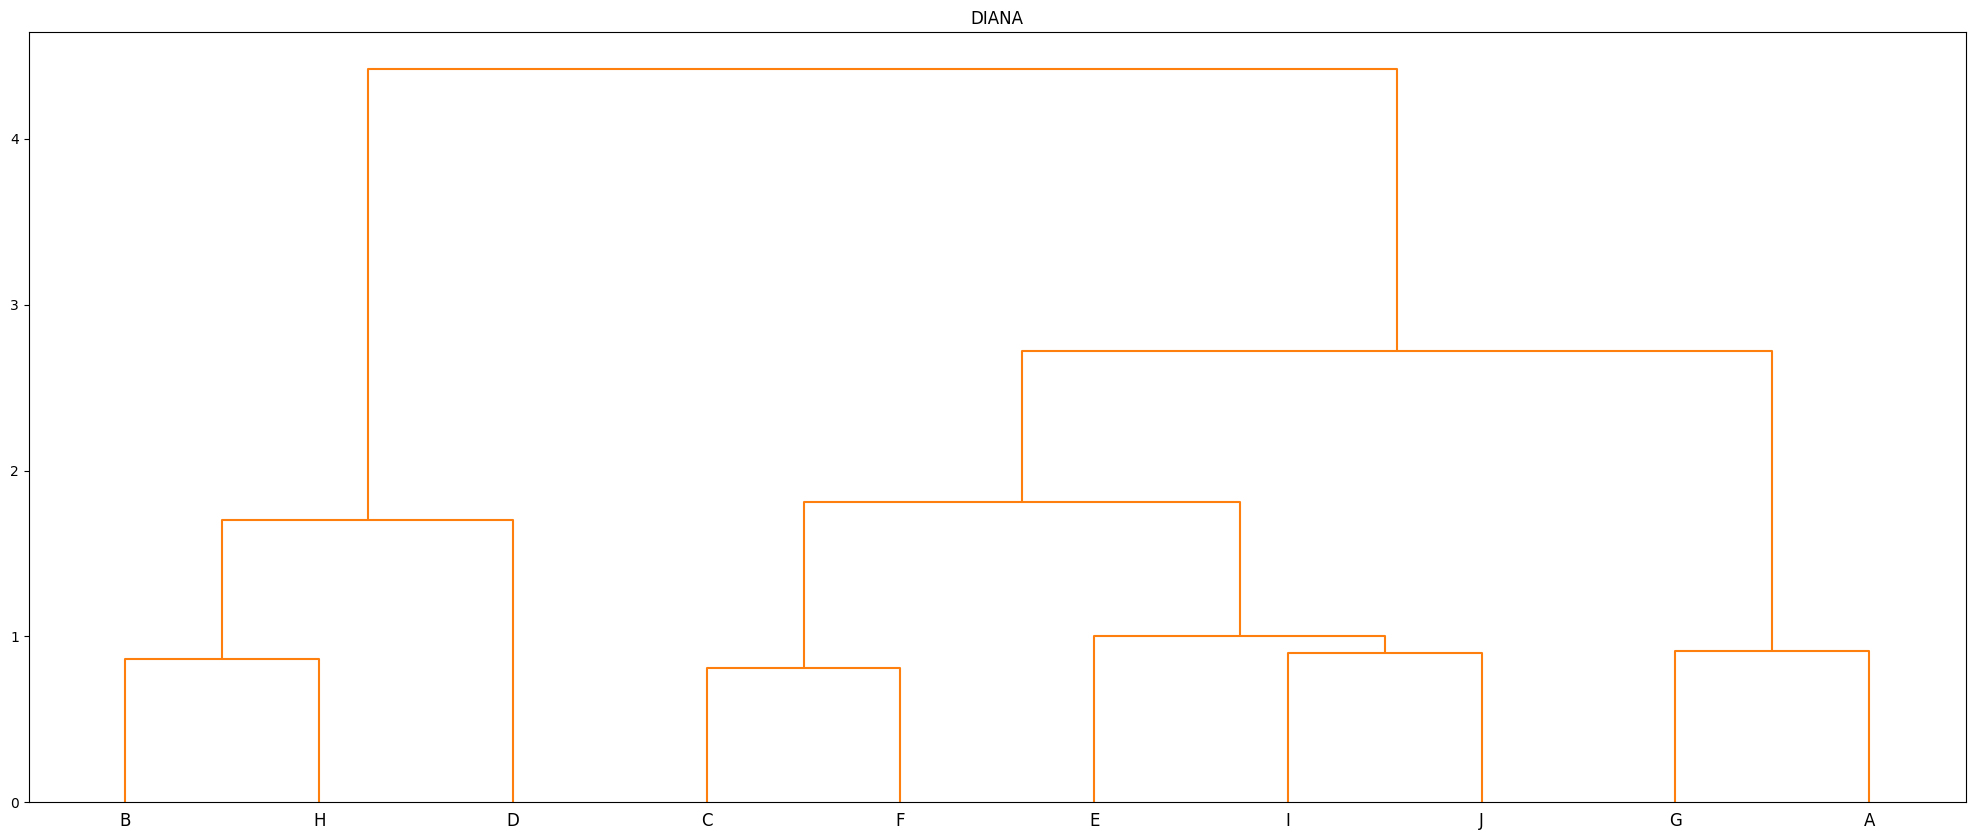

In [8]:
divisive_clustering_function = DivisiveClusteringVQE(
    circuit_depth=circuit_depth,
    max_iterations=max_iterations,
    max_shots=max_shots,
    threshold_for_max_cut=threshold_for_max_cut,
)

hierrachial_sequence_using_VQE = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_VQE)

VQE_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_VQE, coreset_df))

print(f"cost: {VQE_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_VQE)
dendo.plot_dendrogram()

100%|██████████| 2/2 [00:00<00:00, 43464.29it/s]


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 4, 8], [0, 1, 3, 5, 6, 7, 9], [2, 8], [4], [0, 1, 3, 5, 7], [6, 9], [2], [8], [1, 3, 5, 7], [0], [6], [9], [1, 5, 7], [3], [1, 5], [7], [1], [5]]
cost: 430.2386418324492


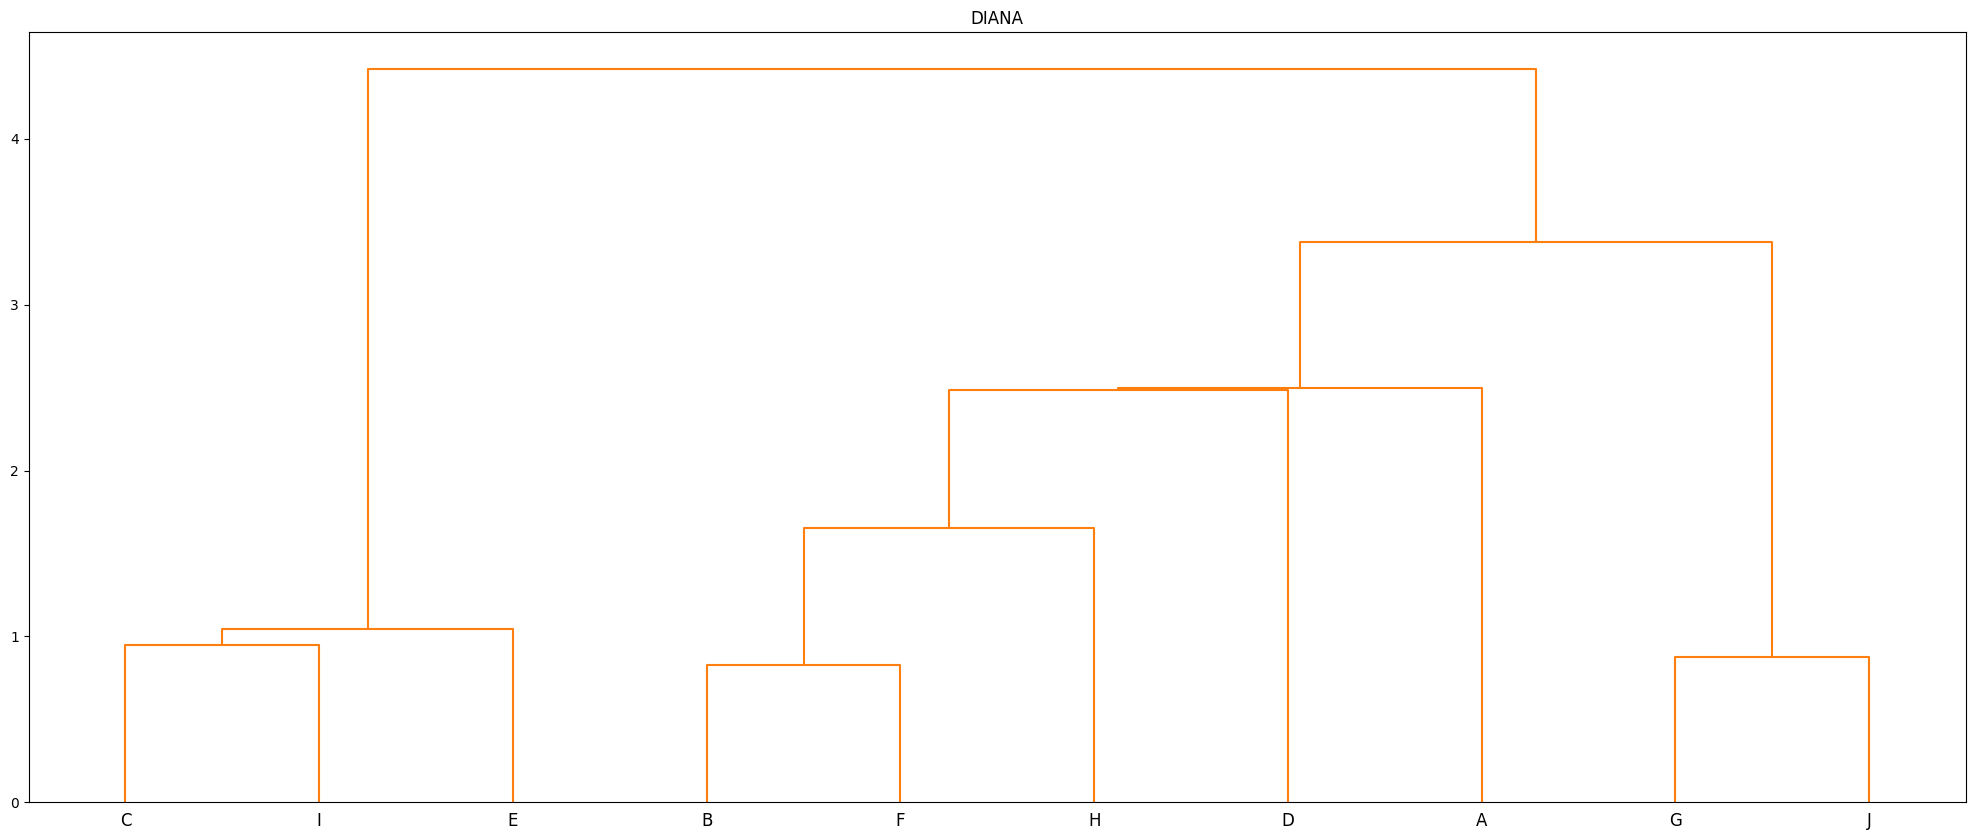

In [9]:
divisive_clustering_function = DivisiveClusteringMaxCut()

hierrachial_sequence_using_MaxCut = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_MaxCut)

MaxCut_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_MaxCut, coreset_df))

print(f"cost: {MaxCut_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_MaxCut)
dendo.plot_dendrogram()

cost: 261.90295292900214


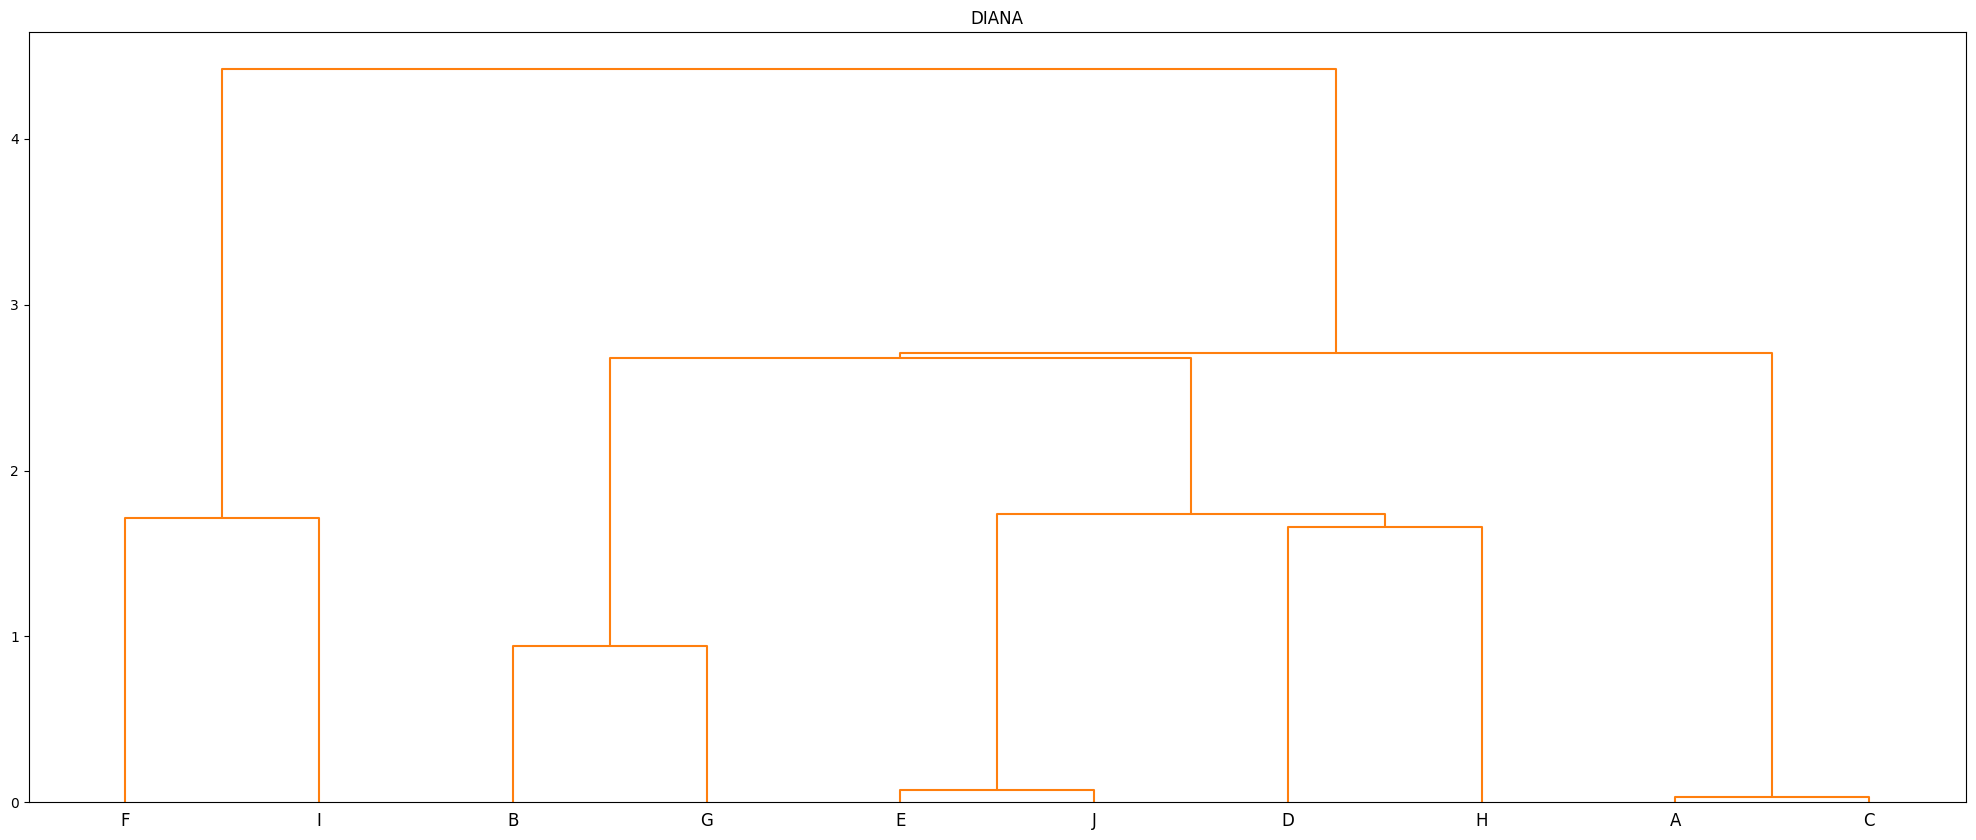

In [12]:
divisive_clustering_function = DivisiveClusteringRandom()

hierrachial_sequence_using_random = get_divisive_sequence(coreset_df, divisive_clustering_function)

random_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_random, coreset_df))

print(f"cost: {random_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_random)
dendo.plot_dendrogram()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 7, 8], [0, 4, 5, 6, 9], [2, 3, 7, 8], [1], [0, 4, 6, 9], [5], [2, 3, 7], [8], [6, 9], [0, 4], [2, 7], [3], [6], [9], [0], [4], [2], [7]]
cost: 311.1828475146717


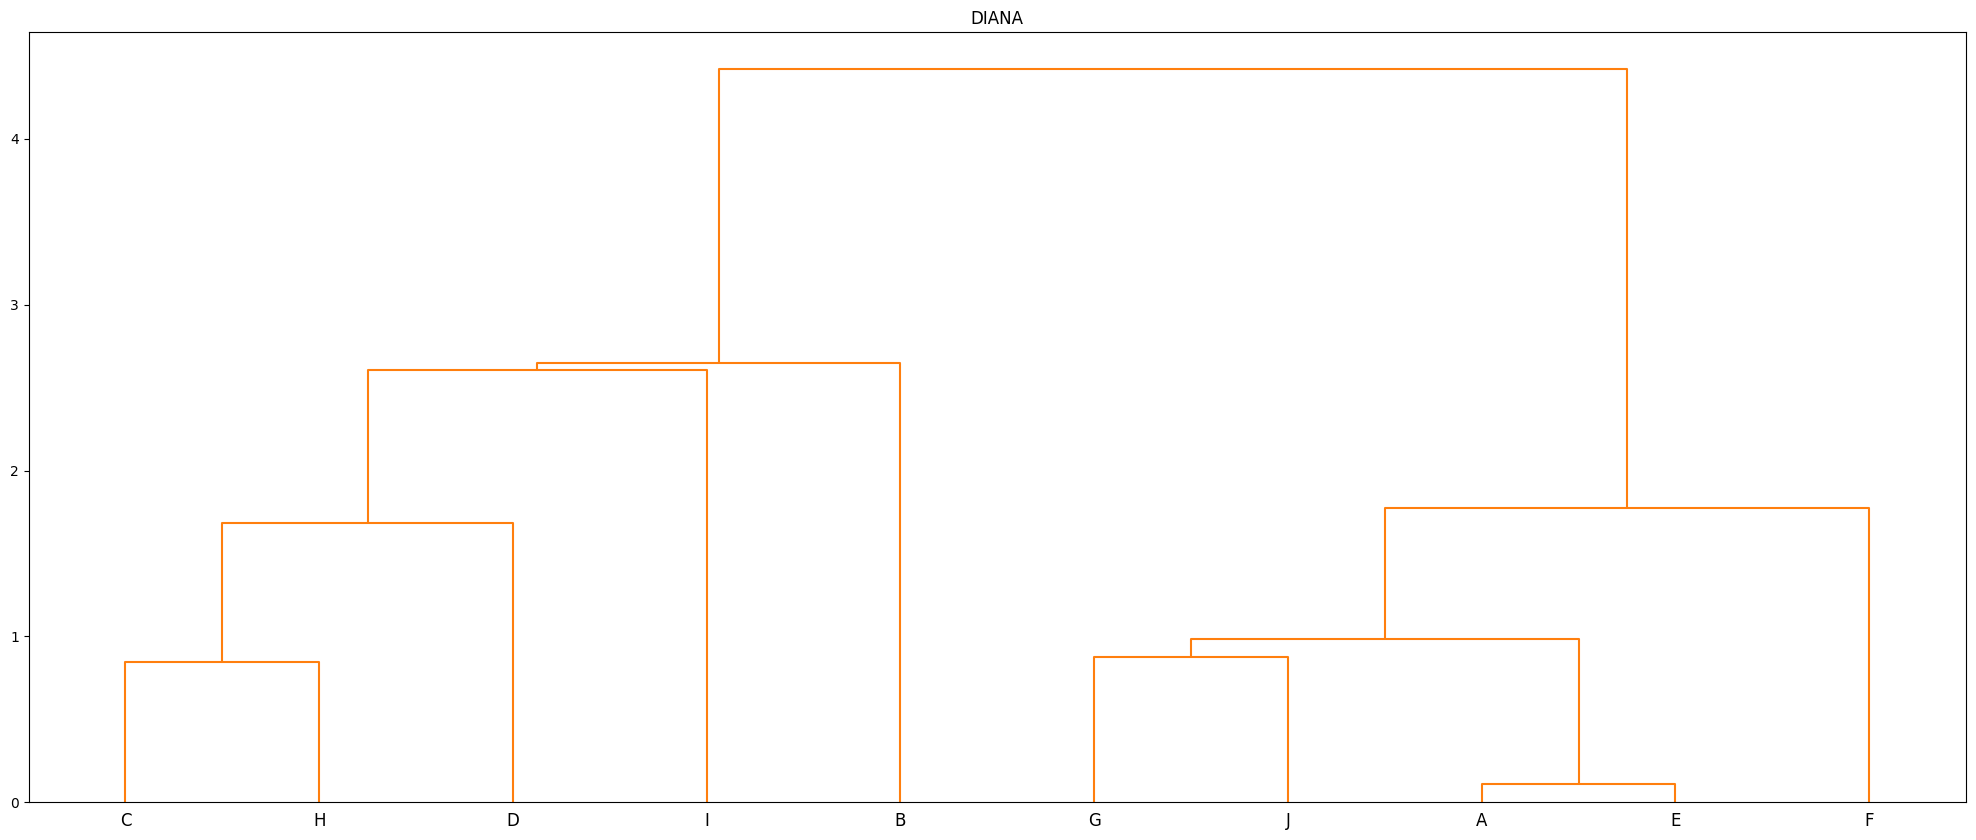

In [13]:
divisive_clustering_function = DivisiveClusteringKMeans()

hierrachial_sequence_using_KMeans = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_KMeans)


KMeans_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_KMeans, coreset_df))

print(f"cost: {KMeans_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_KMeans)
dendo.plot_dendrogram()

## Visualizing the cost output

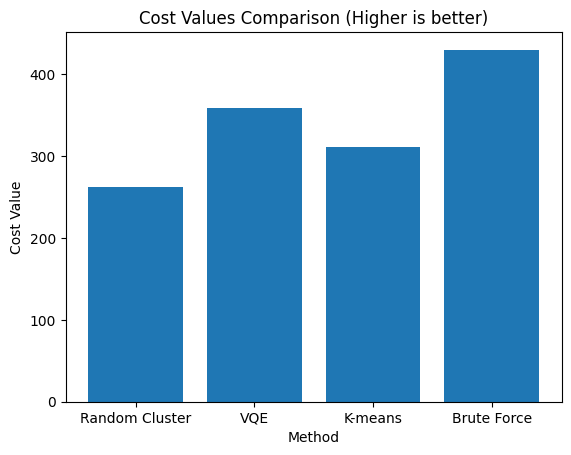

In [15]:
# Define the cost values
cost_values = [random_cost, VQE_cost, KMeans_cost, MaxCut_cost]

# Define the labels for the x-axis
labels = ['Random Cluster','VQE', 'K-means', 'Brute Force']

# Create the bar chart
plt.bar(labels, cost_values)

# Add labels and title
plt.xlabel('Method')
plt.ylabel('Cost Value')
plt.title('Cost Values Comparison (Higher is better)')

# Display the chart
plt.show()